# **Kalbe Nutritionals Project Based Internship**



 IMPORT LIBRARY



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

Convert CSV Files to Dataframe

In [ ]:
df_customer = pd.read_csv('Customer.csv', delimiter= ';')
df_product = pd.read_csv('Product.csv', delimiter= ';')
df_store = pd.read_csv('Store.csv', delimiter= ';')
df_transaction = pd.read_csv('Transaction.csv', delimiter= ';')

Melihat ukuran data

In [ ]:
df_customer.shape, df_product.shape, df_store.shape, df_transaction.shape

((447, 5), (10, 3), (14, 6), (5020, 8))

In [ ]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

In [ ]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
df_product.dtypes

ProductID       object
Product Name    object
Price            int64
dtype: object

In [ ]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
df_store.dtypes

StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object

In [ ]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [ ]:
df_transaction.dtypes

TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object

Data cleansing df_customer

In [ ]:
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype('float')

Data cleansing df_Store

In [ ]:
df_store['Latitude'] = df_store['Latitude'].replace('[,]','.',regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.',regex=True).astype('float')

Data cleansing df_transaction

In [ ]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

<ipython-input-17-433e6c690dce>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])


In [ ]:
#Detecting the Missing Value
df_customer.isnull()

,CustomerID,Age,Gender,Marital Status,Income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
442,False,False,False,True,False
443,False,False,False,False,False
444,False,False,False,False,False
445,False,False,False,False,False


In [ ]:
#Detecting the Missing Value
df_product.isnull()

,ProductID,Product Name,Price
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
#Detecting the Missing Value
df_store.isnull()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
#Detecting the Missing Value
df_transaction.isnull()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
5015,False,False,False,False,False,False,False,False
5016,False,False,False,False,False,False,False,False
5017,False,False,False,False,False,False,False,False
5018,False,False,False,False,False,False,False,False


In [ ]:
# Memeriksa apakah ada nilai yang hilang di setiap kolom DataFrame df_customer
missing_values1 = df_customer.isnull().any()
missing_values2 = df_product.isnull().any()
missing_values3 = df_store.isnull().any()
missing_values4 = df_transaction.isnull().any()

# Menampilkan kolom-kolom dengan nilai yang hilang (jika ada)
print('Customer')
print(missing_values1)

print('\nProduct')
print(missing_values2)

print('\nStore')
print(missing_values3)

print('\nTransaction')
print(missing_values4)

Customer
CustomerID        False
Age               False
Gender            False
Marital Status     True
Income            False
dtype: bool

Product
ProductID       False
Product Name    False
Price           False
dtype: bool

Store
StoreID       False
StoreName     False
GroupStore    False
Type          False
Latitude      False
Longitude     False
dtype: bool

Transaction
TransactionID    False
CustomerID       False
Date             False
ProductID        False
Price            False
Qty              False
TotalAmount      False
StoreID          False
dtype: bool


In [ ]:
# Memeriksa apakah ada nilai yang hilang di setiap kolom DataFrame df_customer
missing_values1 = df_customer.isnull().sum()
missing_values2 = df_product.isnull().sum()
missing_values3 = df_store.isnull().sum()
missing_values4 = df_transaction.isnull().sum()

# Menampilkan kolom-kolom dengan nilai yang hilang (jika ada)
print('Customer', missing_values1)
print('\nProduct', missing_values2)
print('\nStore', missing_values3)
print('\nTransaction', missing_values4)

Customer CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

Product ProductID       0
Product Name    0
Price           0
dtype: int64

Store StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Transaction TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64


In [ ]:
# Mengatasi Missing Value Customer (Marital Status)
df_customer['Marital Status'].fillna('No Status', inplace=True)
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [ ]:
# Mengecek data duplikat
duplicate_rows1 = df_customer[df_customer.duplicated()]
duplicate_rows2 = df_product[df_product.duplicated()]
duplicate_rows3 = df_store[df_store.duplicated()]
duplicate_rows4 = df_transaction[df_transaction.duplicated()]

# Menampilkan baris data yang duplikat
print("Data Duplikat Customer:", duplicate_rows1)
print("\nData Duplikat Product:", duplicate_rows2)
print("\nData Duplikat Store:", duplicate_rows2)
print("\nData Duplikat Transaction:", duplicate_rows2)

Data Duplikat Customer: Empty DataFrame
Columns: [CustomerID, Age, Gender, Marital Status, Income]
Index: []

Data Duplikat Product: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []

Data Duplikat Store: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []

Data Duplikat Transaction: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []


In [ ]:
df_transaction['TransactionID'].value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [ ]:
df_transaction [df_transaction['TransactionID'] == 'TR71313' ]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


Data Merge

In [ ]:
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID')
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on='ProductID')
df_merge = pd.merge(df_merge, df_store, on='StoreID')

In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [ ]:
df_merge.duplicated().sum()

0

Machine Learning Regression (Time Series)

In [ ]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

In [ ]:
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


Analisis

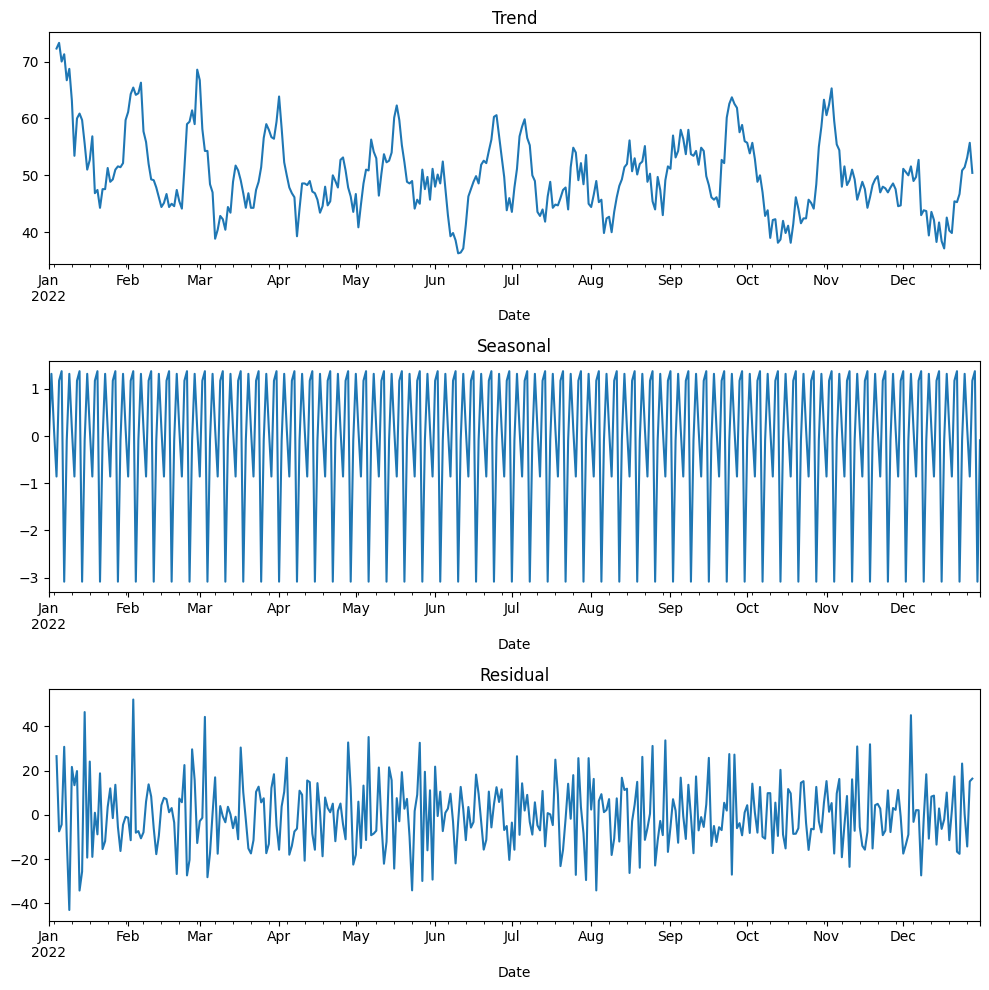

In [ ]:
# Decomposition Analysis (Trend, Seasonal, Residual)
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title("Trend")

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonal')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()
plt.show()

Uji Stasioner

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Uji ADF pada kolom 'Qty' dari DataFrame 'df_regression'
result = adfuller(df_regresi['Qty'])

# Menampilkan hasil uji ADF
print('Augmented Dickey-Fuller Test Results:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Menyimpulkan hasil uji berdasarkan p-value
if result[1] <= 0.05:
    print('\nHasil uji menunjukkan bahwa data adalah stasioner (Reject H0)')
else:
    print('\nHasil uji menunjukkan bahwa data bukan stasioner (Fail to Reject H0)')

Augmented Dickey-Fuller Test Results:
ADF Statistic: -19.018783
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571

Hasil uji menunjukkan bahwa data adalah stasioner (Reject H0)


In [ ]:
# Memisahkan Data
cut_off = round(df_regresi.shape[0] * 0.8)

df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)

df_train.shape, df_test.shape

((292, 2), (73, 2))

In [ ]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [ ]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,44


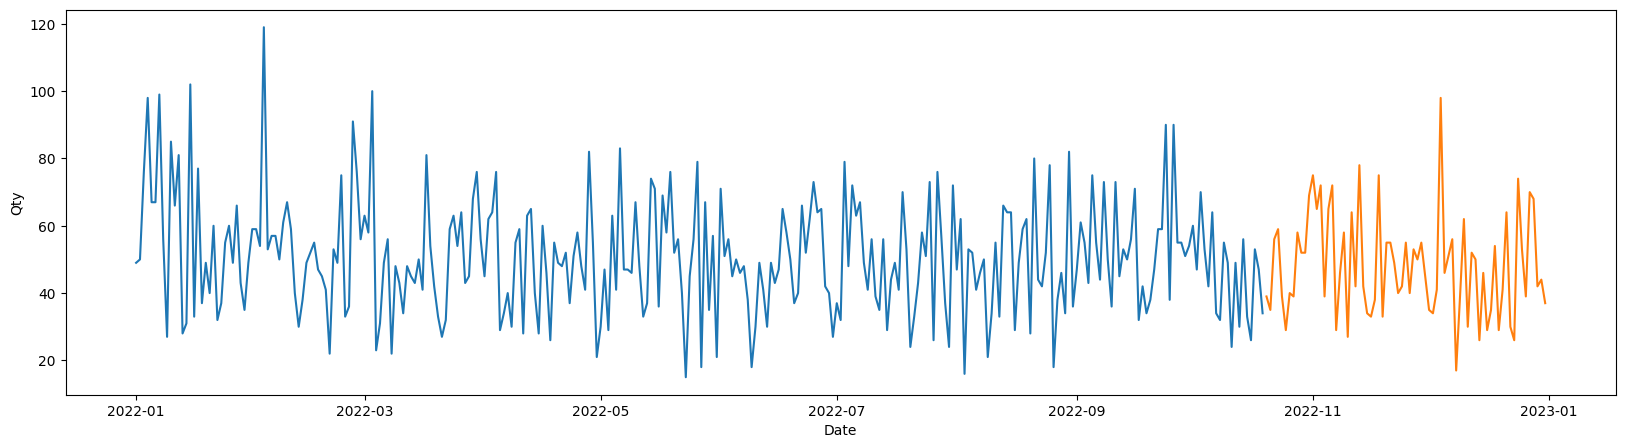

In [ ]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty'])

plt.show()

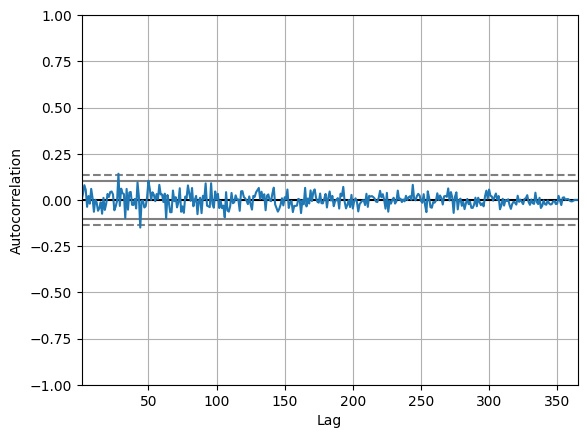

In [ ]:
autocorrelation_plot(df_regresi['Qty']);

# Metode Time Series ARIMA

RMSE value: 15.47240015957555
MAE value: 12.357079716384185


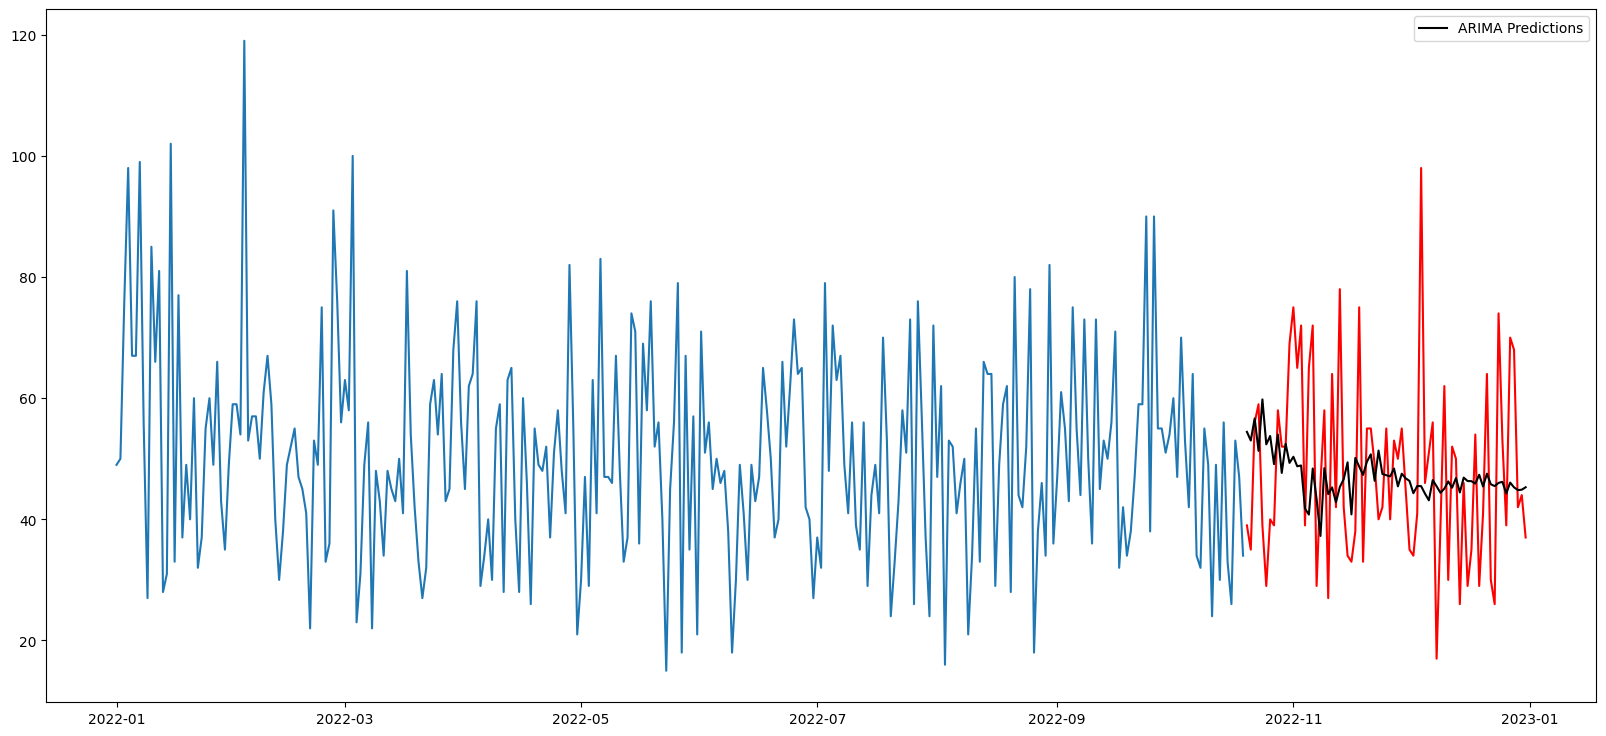

In [ ]:
# Define the rase function
def rase(y_actual, y_pred):
    # Calculate RMSE
    rmse = mean_squared_error(y_actual, y_pred) ** 0.5
    print(f'RMSE value: {rmse}')

# Define the eval function
def eval(y_actual, y_pred):
    # Evaluate machine learning modeling
    rase(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    print(f'MAE value: {mae}')

# Set the index for df_train and df_test
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

# Perform ARIMA modeling
y = df_train['Qty']
ARIMAmodel = ARIMA(y, order=(40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

# Make predictions
y_pred = ARIMAmodel.get_forecast(len(df_test))
y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']

# Evaluate and plot the results
eval(df_test['Qty'], y_pred_out)
plt.figure(figsize=(20, 9))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()
plt.show()

# Clustering

In [ ]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
#identifikasi kolom yang memiliki redundant/corelasi tinggi
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,0.005783,0.002278,-0.003122
Price,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,-0.029008,0.018652
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.028425,-0.004170,0.004807
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,-0.025350,-0.029938,0.025437
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,0.001613,0.471852,-0.094943
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.486692,0.009266,0.015951
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,-0.071443,-0.006051,-0.001183
Income,0.005783,0.001196,-0.028425,-0.025350,0.001613,0.486692,-0.071443,1.000000,0.015518,0.004385
Latitude,0.002278,-0.029008,-0.004170,-0.029938,0.471852,0.009266,-0.006051,0.015518,1.000000,-0.395995
Longitude,-0.003122,0.018652,0.004807,0.025437,-0.094943,0.015951,-0.001183,0.004385,-0.395995,1.000000


In [ ]:
# Membuat data baru untuk clustering, yaitu groupby by customerID lalu yang di aggregasi
df_cluster = df_merge.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [ ]:
data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

# Clustering using KMeans Method

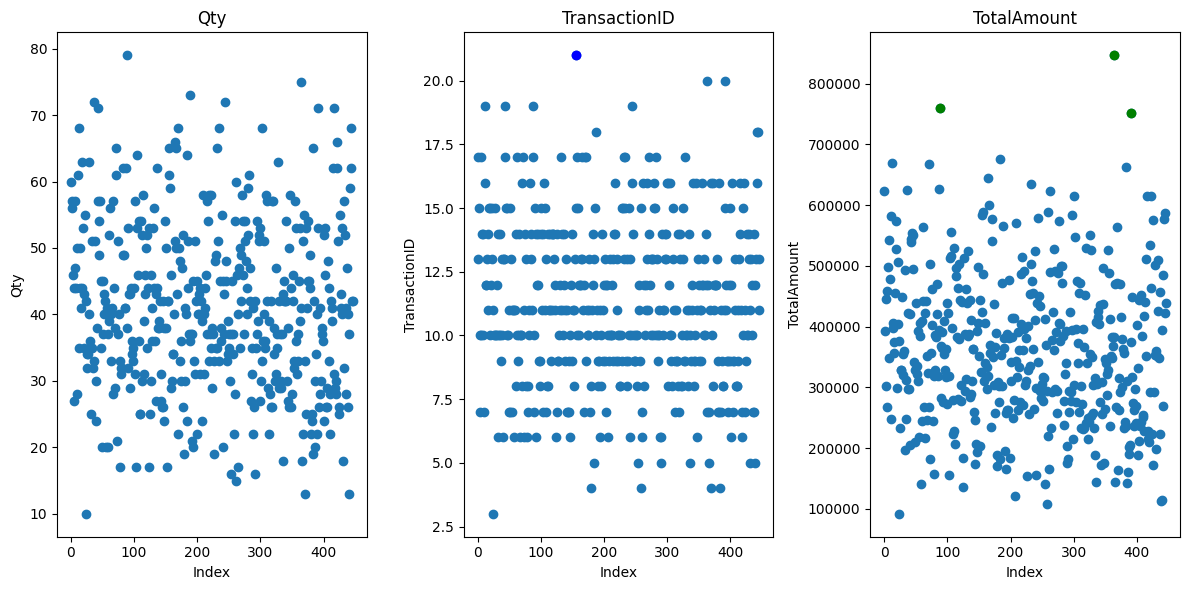

In [ ]:
# Calculate Z-score for each data point
numeric_cols = ['TransactionID', 'Qty', 'TotalAmount']
z_scores = np.abs((df_cluster[numeric_cols] - df_cluster[numeric_cols].mean()) / df_cluster[numeric_cols].std())

# Define a threshold for outliers
outlier_threshold = 3

# Identify outliers
outliers = df_cluster[z_scores > outlier_threshold]

# Plot the data
plt.figure(figsize=(12, 6))

# Plot for 'Qty'
plt.subplot(1, 3, 1)
plt.scatter(df_cluster.index, df_cluster['Qty'], label='Qty')
plt.scatter(outliers.index, outliers['Qty'], color='red', label='Outliers (Qty)')
plt.xlabel('Index')
plt.ylabel('Qty')
plt.title('Qty')

# Plot for 'TransactionID'
plt.subplot(1, 3, 2)
plt.scatter(df_cluster.index, df_cluster['TransactionID'], label='TransactionID')
plt.scatter(outliers.index, outliers['TransactionID'], color='blue', label='Outliers (TransactionID)')
plt.xlabel('Index')
plt.ylabel('TransactionID')
plt.title('TransactionID')

# Plot for 'TotalAmount'
plt.subplot(1, 3, 3)
plt.scatter(df_cluster.index, df_cluster['TotalAmount'], label='TotalAmount')
plt.scatter(outliers.index, outliers['TotalAmount'], color='green', label='Outliers (TotalAmount)')
plt.xlabel('Index')
plt.ylabel('TotalAmount')
plt.title('TotalAmount')

plt.tight_layout()
plt.show()

Tidak diperlukan proses lanjutan karena tidak ada banyak outlier yang signifikan yang dapat terdeteksi.

In [ ]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in df_cluster
df_cluster_std = scaler.fit_transform(df_cluster.values)

# Convert the standardized data back to a DataFrame
df_cluster_std = pd.DataFrame(df_cluster_std, columns=df_cluster.columns)

# check the df_cluster_std data
df_cluster_std.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,-1.728180,1.779816,1.496527,2.094768
1,-1.720431,0.545884,1.261093,0.239269
2,-1.712681,1.162850,1.182615,0.672218
3,-1.704931,-0.379565,0.397833,-0.482047
4,-1.697182,-1.305014,-1.093251,-0.754347


In [ ]:
# check null values
df_cluster_std.isnull().sum()

CustomerID       0
TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

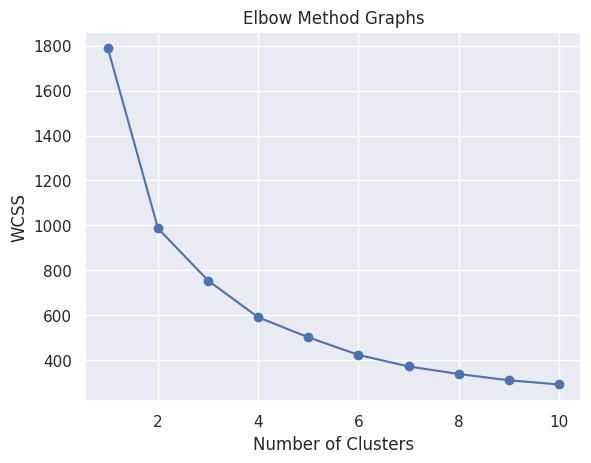

In [ ]:
# plot the elbow method to get best number of clusters
wcss = [] # wcss is Within Cluster of Sum Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(df_cluster_std.values)
    wcss.append(kmeans.inertia_)

# plot the elbow method
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

dapat dilihat bahwa clusters Kmeans terbaik adalah di n = 3

**KMeans Model Segmentation**

In [ ]:
# make KMeans with n = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans.fit_predict(df_cluster_std)
df_cluster['cluster'] = clusters

# Display the DataFrame with the cluster labels
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,0
1,2,13,57,392300,0
2,3,15,56,446200,0
3,4,10,46,302500,1
4,5,7,27,268600,2


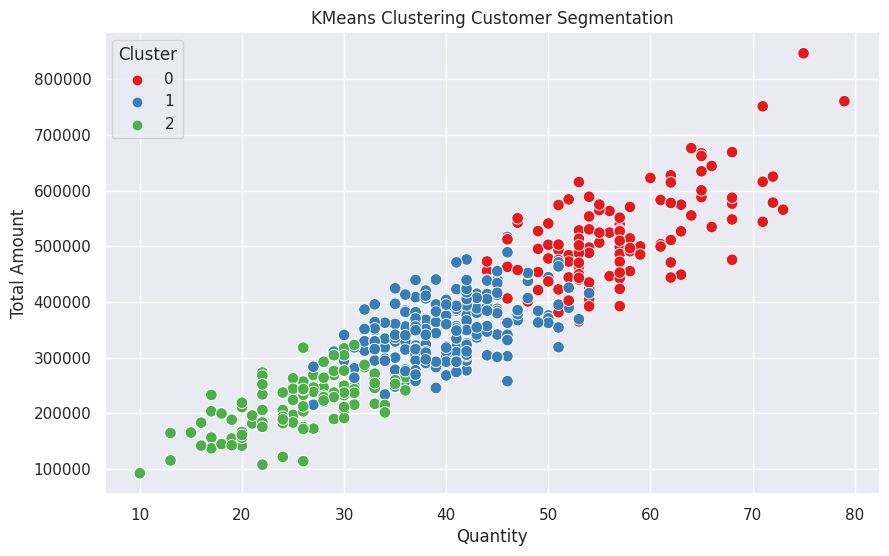

In [ ]:
# Convert 'cluster' column to categorical data type
df_cluster['cluster'] = df_cluster['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='TotalAmount', data=df_cluster, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

In [ ]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_cluster_normalize)
    fits.append(model)
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

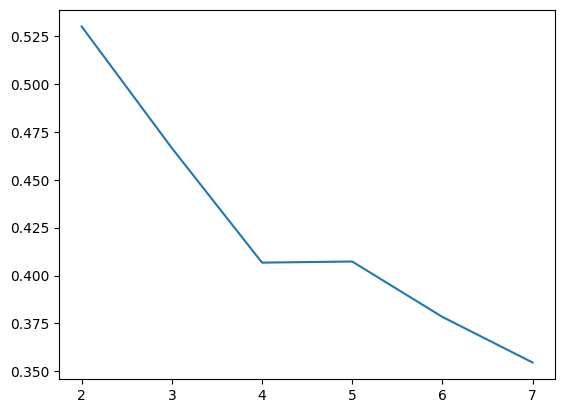

In [ ]:
# Visualisasi silhouette score
sns.lineplot(x = K, y = score);

In [ ]:
fits[2]

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [ ]:
df_cluster['cluster label'] = fits[2].labels_

In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount,cluster,cluster label
0,1,17,60,623300,0,0
1,2,13,57,392300,0,3
2,3,15,56,446200,0,3
3,4,10,46,302500,1,1
4,5,7,27,268600,2,0
...,...,...,...,...,...,...
442,443,16,59,485100,0,3
443,444,18,62,577700,0,2
444,445,18,68,587200,0,2
445,446,11,42,423300,1,0


In [ ]:
# Mengelompokkan DataFrame
df_cluster.groupby(['cluster label']).agg({
    'CustomerID':'count',
    'TransactionID' : 'mean',
    'Qty': 'mean',
    'TotalAmount' : 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926


<Figure size 300x300 with 0 Axes>

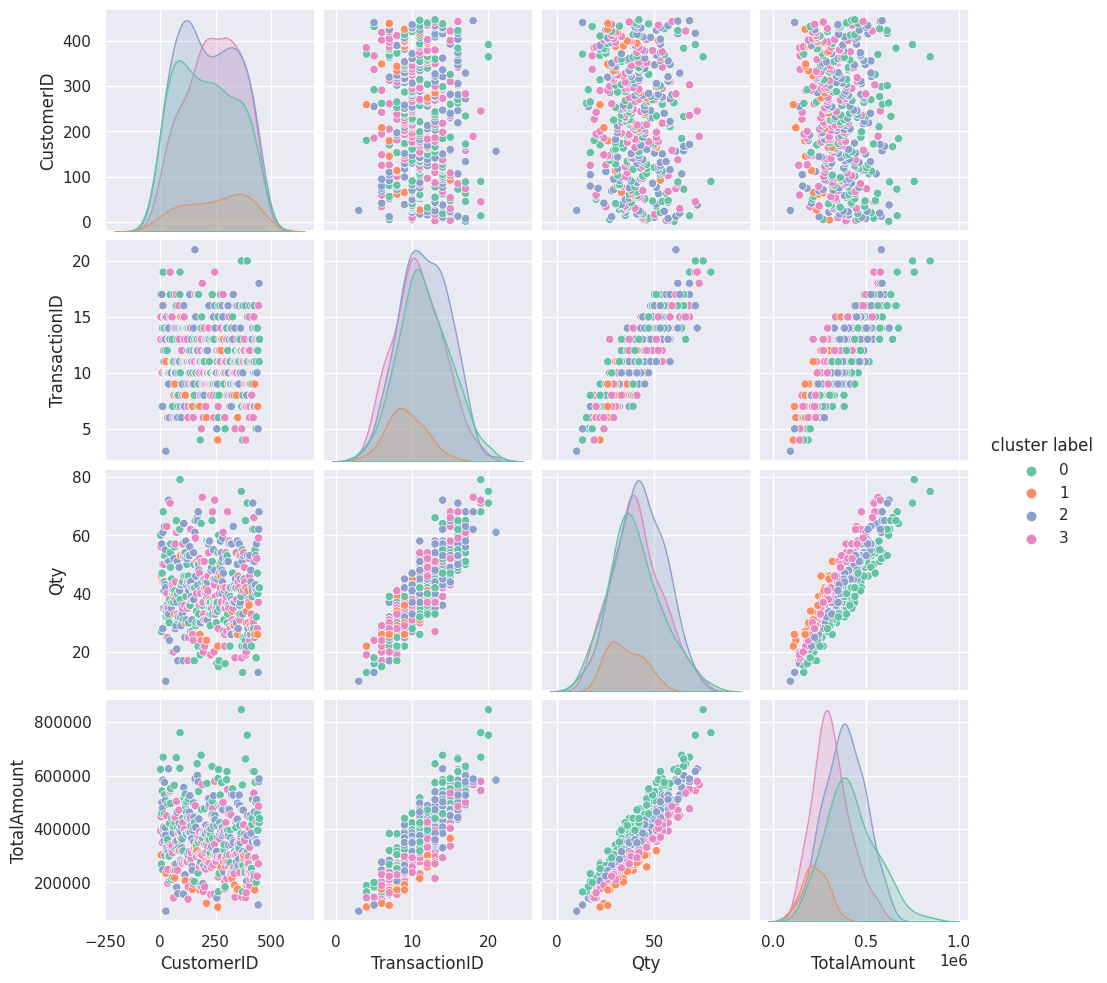

In [ ]:
plt.figure(figsize=(3,3))
sns.pairplot(data=df_cluster,hue='cluster label',palette='Set2')
plt.show()